SECTION 0.1::Kaggle Connection  ### No need to  run this section , run from section 0.2 ##

In [ ]:
!pip install kaggle
from google.colab import files 

files.upload() #download and upload json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


SECTION 0.2:  Dataset adding  ###   RUN FROM HERE     ###

In [ ]:
#!kaggle datasets download -d freego1/bmi-data
!wget https://github.com/atikshahariar21699/DATAMINNING-DATASET/raw/main/bmi-data.zip


--2021-02-14 16:07:34--  https://github.com/atikshahariar21699/DATAMINNING-DATASET/raw/main/bmi-data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atikshahariar21699/DATAMINNING-DATASET/main/bmi-data.zip [following]
--2021-02-14 16:07:34--  https://raw.githubusercontent.com/atikshahariar21699/DATAMINNING-DATASET/main/bmi-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389411 (380K) [application/zip]
Saving to: ‘bmi-data.zip’

bmi-data.zip        100%[===================>] 380.28K  --.-KB/s    in 0.03s   

2021-02-14 16:07:34 (11.1 MB/s) - ‘bmi-data.zip’ saved [389411/389411]



In [ ]:
from zipfile import ZipFile
file_name= "bmi-data.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('ZIP to CSV Done')

ZIP to CSV Done


SECTION 0.3: ALL IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import defaultdict
import matplotlib
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.cluster import Birch
from sklearn.metrics import  adjusted_rand_score 
from collections import Counter
from pylab import rcParams
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from numpy.random import choice
from numpy.random import seed
import pylab as pl
from sklearn import metrics


In [ ]:
df = pd.read_csv('/content/bmi_data.csv')
df

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,Female,21,65.78331,112.9925,18.357646
1,Female,35,71.51521,136.4873,18.762652
2,Female,27,69.39874,153.0269,22.338985
3,Male,24,68.21660,142.3354,21.504612
4,Female,18,67.78781,144.2971,22.077669
...,...,...,...,...,...
24995,Male,35,69.50215,118.0312,17.179051
24996,Male,26,64.54826,120.1932,20.281947
24997,Female,23,64.69855,118.2655,19.864050
24998,Male,20,67.52918,132.2682,20.392540


SECTION 0.4: REMOVING NULL VAL FROM DATASET and take the first 500 datas for further operations

In [ ]:
#X = df[['TempAvgF' , 'HumidityHighPercent']]
#x = df[df[['Shop_name','Bikes_available','Shop_location']].notna().all(axis=1)]
Z = df[df[['Age','BMI']].notna().all(axis=1)]
Z = Z.head(500)
Z.to_csv('NONZEROBMI.csv')
print ('non zero dataset createed')
df = pd.read_csv('/content/NONZEROBMI.csv')
df

non zero dataset createed


,Unnamed: 0,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,0,Female,21,65.78331,112.9925,18.357646
1,1,Female,35,71.51521,136.4873,18.762652
2,2,Female,27,69.39874,153.0269,22.338985
3,3,Male,24,68.21660,142.3354,21.504612
4,4,Female,18,67.78781,144.2971,22.077669
...,...,...,...,...,...,...
495,500,Female,23,68.68038,120.6936,17.989442
496,501,Male,32,67.53724,115.7830,17.846662
497,502,Male,33,71.17732,128.6855,17.858508
498,503,Male,34,70.53514,134.7611,19.043743


SECTION 0.5:
DATASET VISUALIZATION

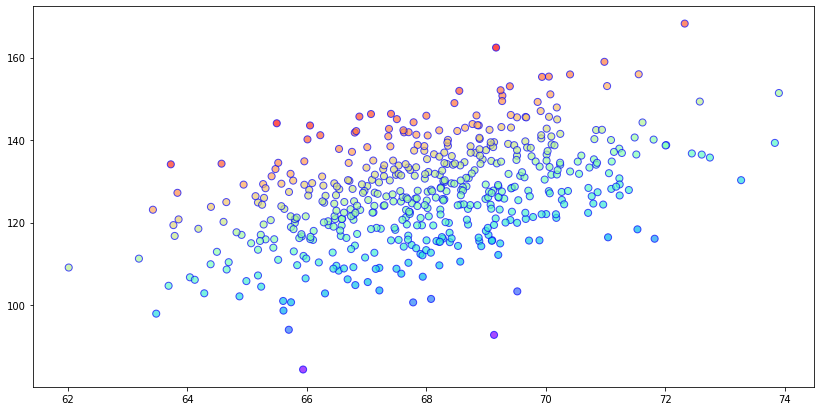

In [ ]:
X = df[['Height(Inches)' , 'Weight(Pounds)']]
y = df['BMI']
ny = y.values.astype('float32', copy = False) #dataframe to numpy array
nX = X.values.astype('float64', copy = False) #dataframe to numpy array
plt.subplots(figsize=(14,7))
#plt.title("KAGGLE HEALTH DATASET")
plt.scatter(X['Height(Inches)'], X['Weight(Pounds)'], c=y, s=50, cmap='rainbow', alpha =.7, edgecolors='b')

plt.show()


SECTION 1.1: KMEANS 4 CLUSTRS WITH HEALTH DATA

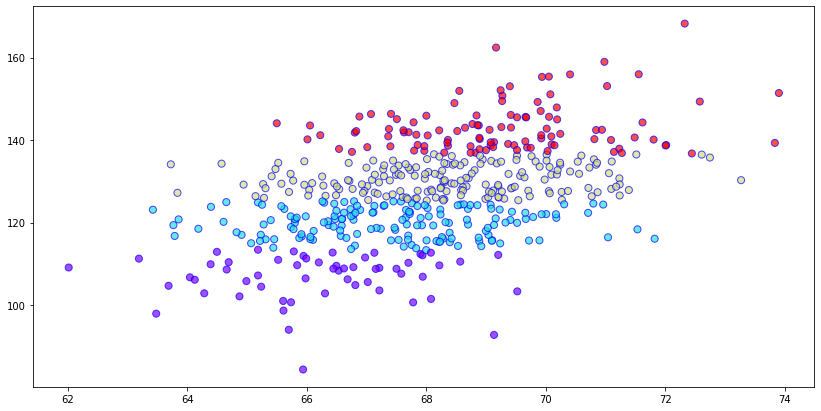

In [ ]:

kmeans = KMeans(n_clusters=4, init='random', max_iter=1000, n_init=50, random_state=0)

kmeans.fit(X)

predicted_values = kmeans.predict(X)

plt.subplots(figsize=(14,7))
plt.scatter(X['Height(Inches)'], X['Weight(Pounds)'], c=predicted_values, s=50, cmap='rainbow', alpha =.7, edgecolors='b')

plt.show()

## CODE REF https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html ##

ARI NMI SILHOUTTE CALCULATION

In [ ]:
ari = adjusted_rand_score(ny,predicted_values)
nmi = normalized_mutual_info_score(ny,predicted_values)
ss = silhouette_score(nX,predicted_values)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.0
NMI= 0.34779280757659287
Silhoutte= 0.4612006762618453


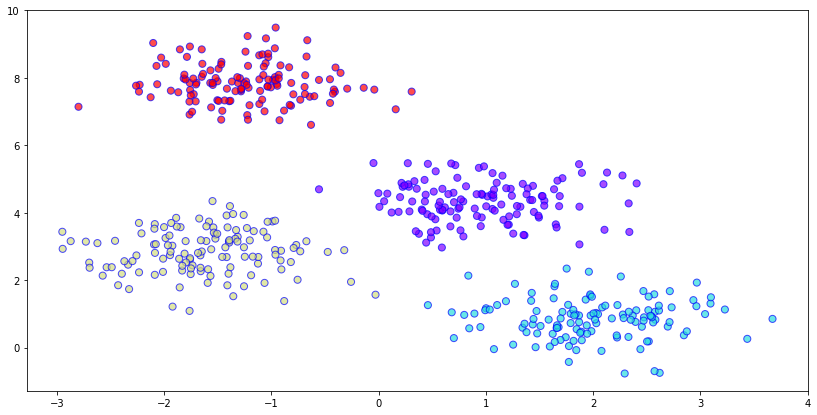

In [ ]:
#custom dataset fig
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
plt.subplots(figsize=(14,7))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='rainbow', alpha =.7, edgecolors='b')

## code ref https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html ##

plt.show()

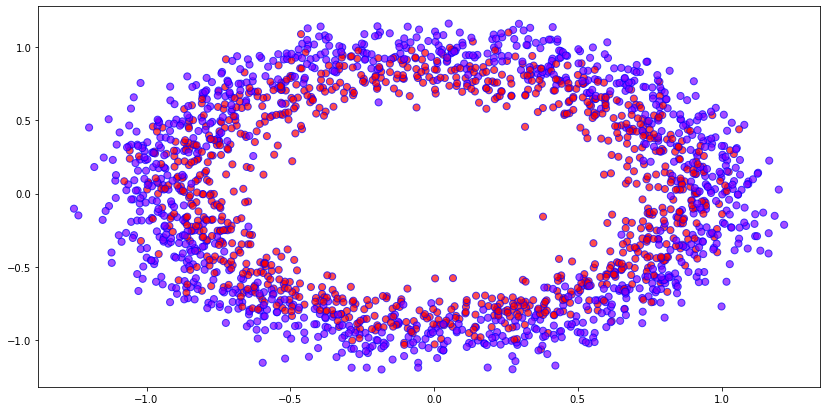

In [ ]:
#custom dataset fig
X1, y1 = make_circles(n_samples=2000, factor=.85, noise=0.1)
plt.subplots(figsize=(14,7))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='rainbow', alpha =.7, edgecolors='b')
##code ref https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html##

plt.show()

SECTION 1.3 : KMEANS 6 CLUSTRS CUSTOM DATA

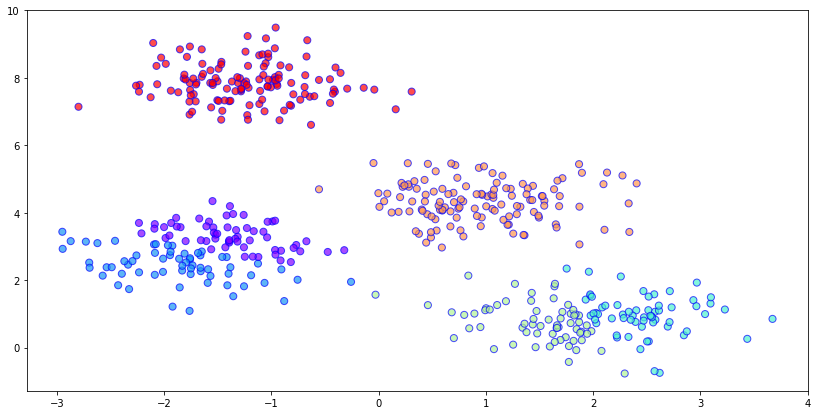

In [ ]:
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=6, init='random', max_iter=1000, n_init=50, random_state=0)

kmeans.fit(X1)

predicted_values = kmeans.predict(X1)

plt.subplots(figsize=(14,7))
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_values, s=50, cmap='rainbow', alpha =.7, edgecolors='b')

plt.show()

ARI NMI SILHOUTTE CALCULATION

In [ ]:
ari = adjusted_rand_score(y1,predicted_values)
nmi = normalized_mutual_info_score(y1,predicted_values)
ss = silhouette_score(X1,predicted_values)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.8140683592163864
NMI= 0.8823332442001638
Silhoutte= 0.5052016792053181


SECTION 1.3: KMEANS 5 CLUSTRS CUSTOM DATA

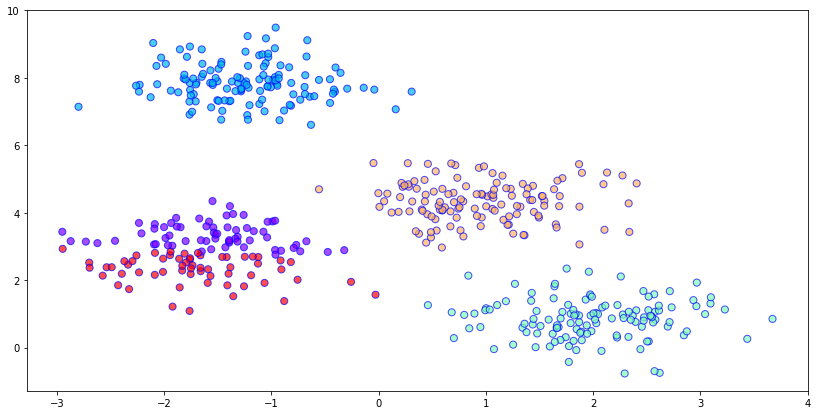

In [ ]:
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=5, init='random', max_iter=100, n_init=50, random_state=0)

kmeans.fit(X1)

predicted_values = kmeans.predict(X1)

plt.subplots(figsize=(14,7))
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_values, s=50, cmap='rainbow', alpha =.7, edgecolors='b')

plt.show()

In [ ]:
ari = adjusted_rand_score(y1,predicted_values)
nmi = normalized_mutual_info_score(y1,predicted_values)
ss = silhouette_score(X1,predicted_values)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.9126176973746245
NMI= 0.941240389891176
Silhoutte= 0.6012432708391022


SECTION 2.1 : BIRCH WITH HEALTH DATA BRANCHING FACTOR 20 THRESHOLD .25

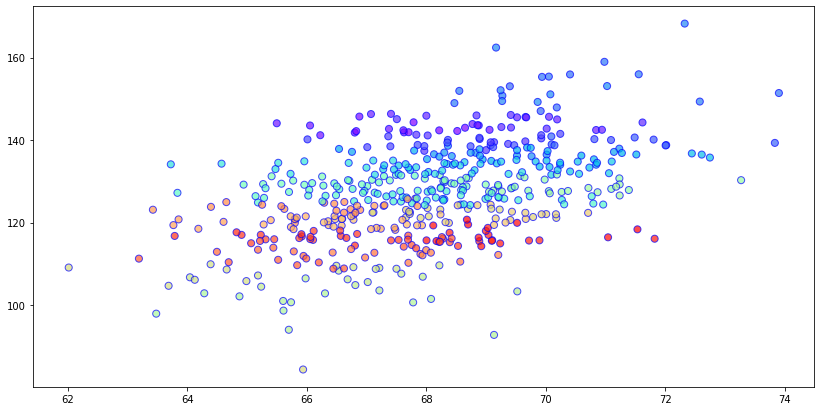

In [ ]:
#brich
X = df[['Height(Inches)' , 'Weight(Pounds)']]
y = df['BMI']
ny = y.values.astype('float32', copy = False) #dataframe to numpy array
nX = X.values.astype('float64', copy = False) #dataframe to numpy array

# Creating the BIRCH clustering model 
model = Birch(branching_factor = 20, n_clusters =None , threshold = 0.25) 
   
model.fit(X) 
  
predicted_values = model.predict(X) 
plt.subplots(figsize=(14,7)) 
plt.scatter(X['Height(Inches)'], X['Weight(Pounds)'], c=predicted_values, s=50, cmap='rainbow', alpha =.7, edgecolors='b')
## Code ref  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html ##

plt.show()

In [ ]:
ari = adjusted_rand_score(ny,predicted_values)
nmi = normalized_mutual_info_score(ny,predicted_values)
ss = silhouette_score(nX,predicted_values)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.0
NMI= 0.9550865583657123
Silhoutte= 0.24020846545066224


SECTION 2.2 :BIRCH WITH CUSTOM DATA BRANCHING FACTOR 50 THRESHhold 1.5

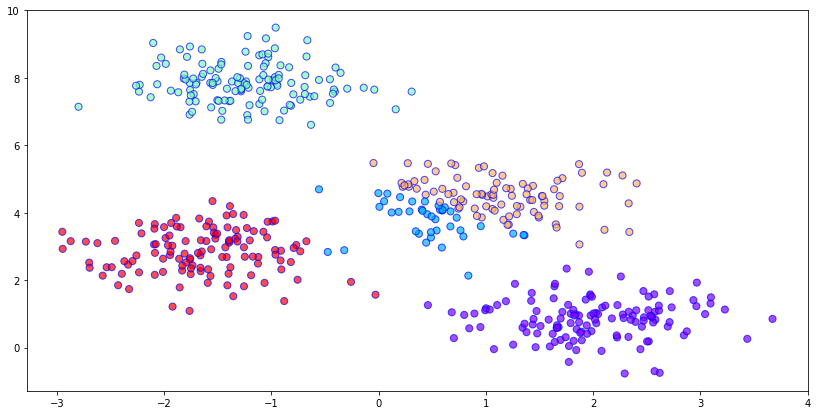

In [ ]:
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
# Creating the BIRCH clustering model 
model = Birch(branching_factor = 50, n_clusters =None , threshold = 1.5) 
  
# Fit the data (Training) 
model.fit(X1) 
  
# Predict the same data 
plt.subplots(figsize=(14,7))
predicted_values = model.predict(X1) 
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_values, s=50, cmap='rainbow', alpha =.7, edgecolors='b')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', alpha=1)
plt.show()
  

In [ ]:
ari = adjusted_rand_score(y1,predicted_values)
nmi = normalized_mutual_info_score(y1,predicted_values)
ss = silhouette_score(X1,predicted_values)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.9165888219084947
NMI= 0.9286549751307419
Silhoutte= 0.560449262318872


SECTION 2.4:BIRCH WITH CUSTOM DATA BRANCHING FACTOR 20 THRESHhold 1.5

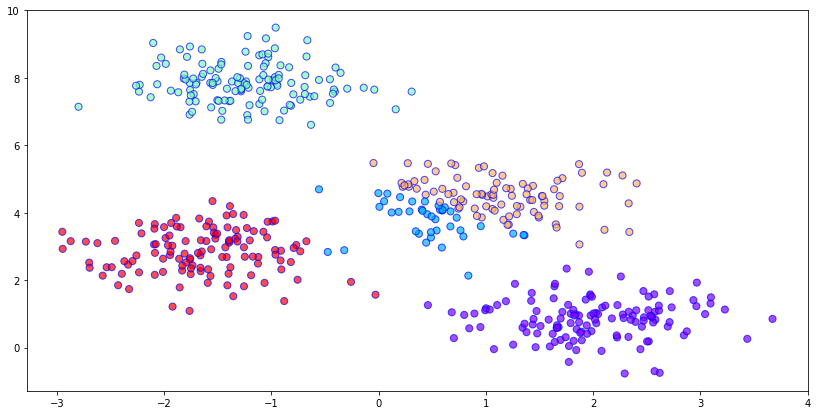

In [ ]:
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
# Creating the BIRCH clustering model 
model = Birch(branching_factor = 20, n_clusters = None , threshold = 1.5) 
  
# Fit the data (Training) 
model.fit(X1) 
  
# Predict the same data 
predicted_values = model.predict(X1)
plt.subplots(figsize=(14,7)) 
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_values, s=50, cmap='rainbow', alpha =.7, edgecolors='b')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', alpha=1)
plt.show()
  

In [ ]:
ari = adjusted_rand_score(y1,predicted_values)
nmi = normalized_mutual_info_score(y1,predicted_values)
ss = silhouette_score(X1,predicted_values)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.9165888219084947
NMI= 0.9286549751307419
Silhoutte= 0.560449262318872


SECTION 2.5: BIRCH WITH CUSTOM DATA BRANCHING FACTOR 20 THRESHhold .8

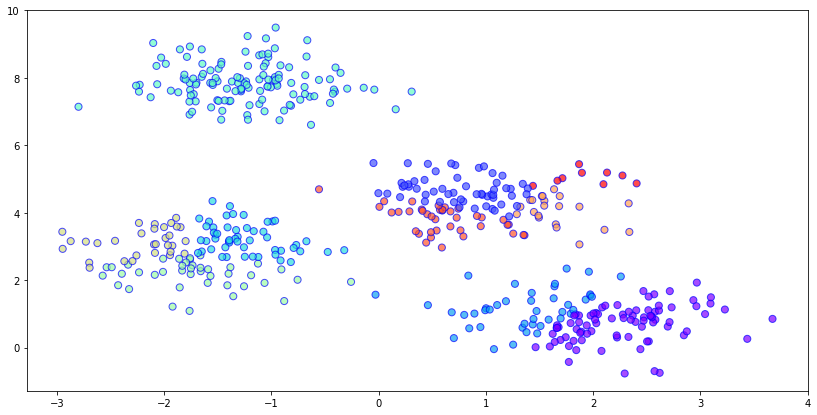

In [ ]:
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
# Creating the BIRCH clustering model 
model = Birch(branching_factor = 20, n_clusters = None , threshold = .8) 
  
# Fit the data (Training) 
model.fit(X1) 
  
# Predict the same data 
plt.subplots(figsize=(14,7))
predicted_values = model.predict(X1) 
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_values, s=50, cmap='rainbow', alpha =.7, edgecolors='b')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', alpha=1)
plt.show()
  

In [ ]:
ari = adjusted_rand_score(y1,predicted_values)
nmi = normalized_mutual_info_score(y1,predicted_values)
ss = silhouette_score(X1,predicted_values)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.6496731261044523
NMI= 0.7857374858304315
Silhoutte= 0.40968249125973377


SECTION 3.1 : DBSCAN HEALTH DATA WITH ESP=1 MINIMUM POINTS=4

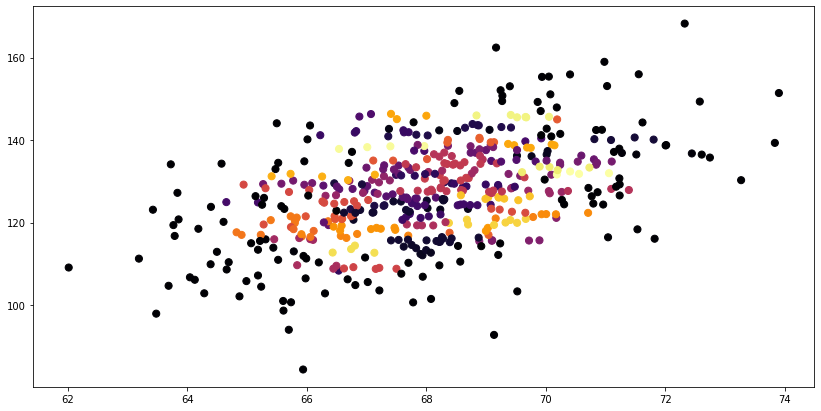

In [ ]:
## code ref  https://github.com/Darkprogrammerpb/DeepLearningProjects/blob/master/Project41/DBSCAN/DBSCAN.ipynb  ##

X = df[['Height(Inches)' , 'Weight(Pounds)']]
y = df['BMI']
ny = y.values.astype('float32', copy = False) #dataframe to numpy array
nX = X.values.astype('float64', copy = False) #dataframe to numpy array
%matplotlib inline


eps = 1
minpts = 4
D = nX

def update_labels(nX,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(nX.shape[0]):
        if np.linalg.norm(nX[pt]-nX[i])<eps:
            neighbors.append(nX[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*nX.shape[0]
C = 1
for p in range(nX.shape[0]):
    if labels[p]==0:
        labels = update_labels(nX,p,eps,labels,C)
        C= C+1
        
#plt.scatter(X['Height(Inches)'], X['Weight(Pounds)'], c=labels, s=50, cmap='rainbow', alpha =.7, edgecolors='b')
#labels= labels[labels != -1]
fig,ax = plt.subplots(figsize=(14,7))


ax.scatter(nX[:,0],nX[:,1],c=labels,s=50,cmap = 'inferno');

In [ ]:
ari = adjusted_rand_score(ny,labels)
nmi = normalized_mutual_info_score(ny,labels)
ss = silhouette_score(nX,labels)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.0
NMI= 0.7541529334698
Silhoutte= -0.02020216144865678


SECTION 3.2: DBSCAN CUSTOM DATA WITH ESP=0.8 MINIMUM POINTS=7

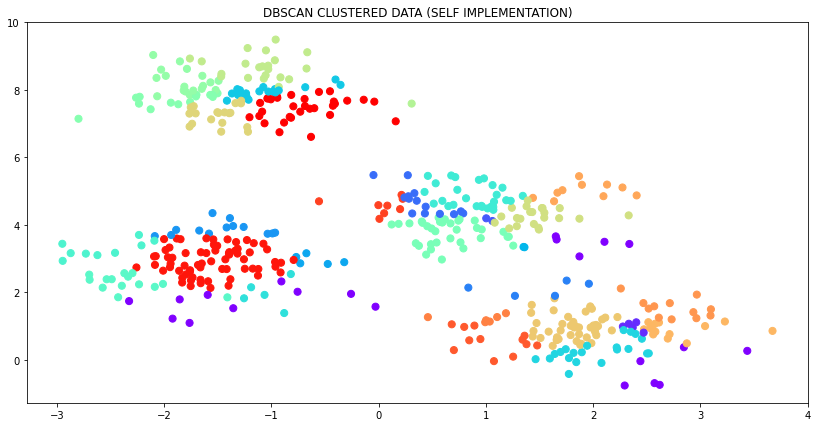

In [ ]:
#X, y = make_circles(n_samples=2000, factor=.85, noise=0.1)
X,y=make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
eps = .8
minpts = 7
D = X

def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*X.shape[0]
C = 1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = update_labels(X,p,eps,labels,C)
        C= C+1
        
fig,ax = plt.subplots(figsize=(14,7))
ax.set_title("DBSCAN CLUSTERED DATA (SELF IMPLEMENTATION)")
ax.scatter(X[:,0],X[:,1],c=labels,s=50,cmap = 'rainbow');

In [ ]:
ari = adjusted_rand_score(y,labels)
nmi = normalized_mutual_info_score(y,labels)
ss = silhouette_score(X,labels)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.289583384262218
NMI= 0.5978172819956774
Silhoutte= 0.10434949424307263


SECTION 3.3: DBSCAN SHAPED DATA WITH ESP=1 MINIMUM POINTS=12

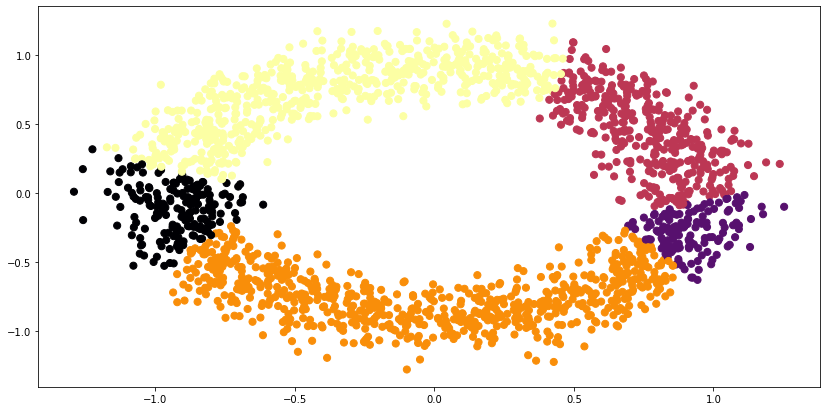

In [ ]:
X, y = make_circles(n_samples=2000, factor=.85, noise=0.1)
eps = 1
minpts = 12
D = X

def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*X.shape[0]
C = 1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = update_labels(X,p,eps,labels,C)
        C= C+1
        
fig,ax = plt.subplots(figsize=(14,7))

ax.scatter(X[:,0],X[:,1],c=labels,s=50,cmap = 'inferno');

In [ ]:
ari = adjusted_rand_score(y,labels)
nmi = normalized_mutual_info_score(y,labels)
ss = silhouette_score(X,labels)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.0005492937856759129
NMI= 0.0028039629786229888
Silhoutte= 0.24855352647429793


SECTION 4.1 KMEDIODS WITH HEALTH DATA

In [ ]:

X = df[['Height(Inches)' , 'Weight(Pounds)']]
y = df['BMI']
ny = y.values.astype('float32', copy = False) #dataframe to numpy array
nX = X.values.astype('float64', copy = False) #dataframe to numpy array


In [ ]:
#X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)
def init_medoids(X, k):
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    
    return X[samples, :]
    

In [ ]:
##### Codee ref   https://www.coder.work/article/4976735  ####

def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1, len(medoids)))
    k = len(medoids)

    S = np.empty((m, k))

    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i ** p

    return S

def assign_labels(S):
    return np.argmin(S, axis=1)

def update_medoids(X, medoids, p):
    S = compute_d_p(X, medoids, p)
    labels = assign_labels(S)

    out_medoids = medoids

    for i in set(labels):

        avg_dissimilarity = np.sum(compute_d_p(X, medoids[i], p))

        cluster_points = X[labels == i]

        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity = np.sum(compute_d_p(X, datap, p))

            if new_dissimilarity < avg_dissimilarity:
                avg_dissimilarity = new_dissimilarity

                out_medoids[i] = datap

    return out_medoids


def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids

    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()

        S = compute_d_p(X, medoids, p)

        labels = assign_labels(S)

        medoids = update_medoids(X, medoids, p)

        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids, labels)

 

In [ ]:
medoids, predY = kmedoids(nX, 5, 2)
medoids

array([[ 68.02403, 127.4718 ],
       [ 68.3384 , 127.5846 ],
       [ 67.1369 , 127.2428 ],
       [ 68.08281, 127.9598 ],
       [ 67.4369 , 126.8241 ]])

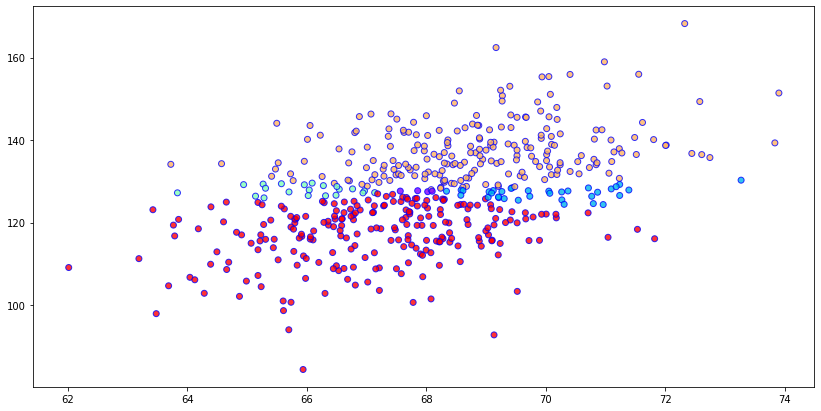

In [ ]:
plt.subplots(figsize=(14,7))
plt.scatter(nX[:, 0], nX[:, 1], c = predY, cmap = 'rainbow', alpha = 0.8, edgecolors = 'b')
plt.show()

In [ ]:
ari = adjusted_rand_score(ny,predY)
nmi = normalized_mutual_info_score(ny,predY)
ss = silhouette_score(X,predY)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.0
NMI= 0.29524214786486747
Silhoutte= 0.09581241951780382


SECTION 4.2 : KMEDIODS WITH CUSTOM DATA

In [ ]:
X,y=make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
def init_medoids(X, k):
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    
    return X[samples, :]


def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1, len(medoids)))
    k = len(medoids)

    S = np.empty((m, k))

    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i ** p

    return S

def assign_labels(S):
    return np.argmin(S, axis=1)

def update_medoids(X, medoids, p):
    S = compute_d_p(X, medoids, p)
    labels = assign_labels(S)

    out_medoids = medoids

    for i in set(labels):

        avg_dissimilarity = np.sum(compute_d_p(X, medoids[i], p))

        cluster_points = X[labels == i]

        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity = np.sum(compute_d_p(X, datap, p))

            if new_dissimilarity < avg_dissimilarity:
                avg_dissimilarity = new_dissimilarity

                out_medoids[i] = datap

    return out_medoids


def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids

    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()

        S = compute_d_p(X, medoids, p)

        labels = assign_labels(S)

        medoids = update_medoids(X, medoids, p)

        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids, labels)    

In [ ]:

medoids, predY = kmedoids(X, 6, 1)
medoids

array([[-0.67311392,  3.15553421],
       [-0.62999281,  6.60706585],
       [ 0.12183353,  4.0077954 ],
       [ 0.52941719,  3.8079242 ],
       [ 0.00793137,  4.17614316],
       [ 0.3471383 ,  3.45177657]])

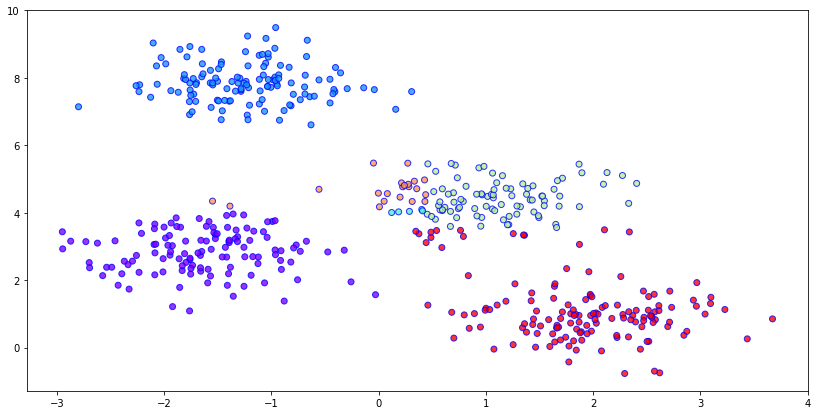

In [ ]:
plt.subplots(figsize=(14,7))
plt.scatter(X[:, 0], X[:, 1], c = predY, cmap = 'rainbow', alpha = 0.8, edgecolors = 'b')
plt.show()

In [ ]:
ari = adjusted_rand_score(y,predY)
nmi = normalized_mutual_info_score(y,predY)
ss = silhouette_score(X,predY)
print('ARI=',ari)
print('NMI=',nmi)
print('Silhoutte=',ss)

ARI= 0.8688805451199739
NMI= 0.8762922755727927
Silhoutte= 0.47320689529039406


SECTION 5.1 :AGENS WITH CUSTOM DATA

In [ ]:
X,y=make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)


[(0.6697869960051712, 3.5954080169749427), (-2.0239699205802193, 7.995690537251104), (1.4328927136346912, 4.376792337344087), (1.0692385339646449, 4.530684839209695), (1.7144444869831275, 5.025215236719037), (0.7438739881017237, 4.122405677103188), (-2.043639424254727, 4.063921233192543), (-0.6786032905906938, 7.887990760472709), (-0.04749203582851247, 5.474252564587464), (-1.4697648775116163, 7.691832509096038), (-0.864176859087595, 6.865286389055093), (-1.848384983179889, 6.908597357575028), (-1.2718254656826475, 7.134603916996876), (-0.934289778427098, 7.732532216908245), (-0.7341574076045355, 7.444844659661506), (3.1851579396666305, 0.08900822325246904), (1.3513934783643822, 2.063836371327512), (-0.09701714830354025, 3.4845699535273713), (-1.931503609616331, 2.9369805962977336), (2.7389079321588583, 0.1567681677257453), (2.3381228529390596, 3.431167922689131), (-1.9367369661928118, 7.572767988794934), (-1.9888536578890952, 3.241431776108213), (2.3346649852711536, -0.024082551828397

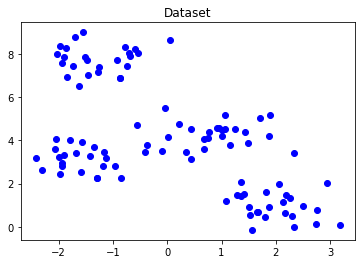

[[(-2.0239699205802193, 7.995690537251104), (-1.9108857784032205, 7.866759063198179), (-1.983517086044251, 8.342077801482523), (-1.8688014798168289, 8.24441672661057), (-1.4697648775116163, 7.691832509096038), (-1.5215752768565562, 7.845947511056628), (-1.9367369661928118, 7.572767988794934), (-1.730301573250455, 7.4217301489914735), (-1.5470752451615333, 8.993179247931785), (-1.6919935725809383, 8.761268772885636), (-0.864176859087595, 6.865286389055093), (-0.8731169041298378, 6.874225422277545), (-1.2718254656826475, 7.134603916996876), (-1.4606521214982406, 7.0104892395907825), (-1.2628514493855116, 7.392641470118181), (-1.848384983179889, 6.908597357575028), (-1.6344268164458846, 6.501418124306938), (-0.6786032905906938, 7.887990760472709), (-0.6957404804776589, 8.026696607407407), (-0.5354378993347692, 8.025625582796504), (-0.7851814440179499, 8.329562508019833), (-0.5884600172138824, 8.228618254075153), (-0.934289778427098, 7.732532216908245), (-0.7341574076045355, 7.444844659661

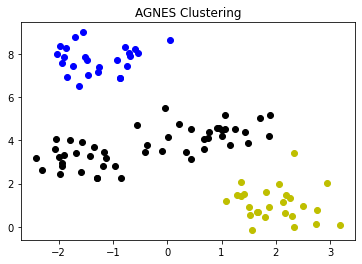

In [ ]:

#### Code reference https://www.programmersought.com/article/72883811165/ ####

def load_dataset():
    data   = X
    dataset = []
    for d in data:
        dataset.append(tuple(d.copy()))
    return dataset


def show_dataset(dataset):
    print(dataset)
    for item in dataset:
        plt.plot(item[0], item[1], 'ob')
    plt.title("Dataset")
    plt.show()


def elu_distance(a, b):
    dist = np.sqrt(np.sum(np.square(np.array(a) - np.array(b))))
    return dist


def dist_min(ci, cj):
    return min(elu_distance(i, j) for i in ci for j in cj)


def dist_max(ci, cj):
    return max(elu_distance(i, j) for i in ci for j in cj)


def dist_avg(ci, cj):
    return sum(elu_distance(i, j) for i in ci for j in cj) / (len(ci) * len(cj))



def find_index(m):
    min_dist = float('inf')
    x = y = 0
    for i in range(len(m)):
        for j in range(len(m[i])):
            if i != j and m[i][j] < min_dist:
                min_dist, x, y = m[i][j], i, j
    return x, y, min_dist


def agnes(dataset, dist, k):
    c, m = [], []
    for item in dataset:
        ci = []
        ci.append(item)
        c.append(ci)
    for i in c:
        mi = []
        for j in c:
            mi.append(dist(i, j))
        m.append(mi)
    q = len(dataset)


    while q > k:
        x, y, min_dist = find_index(m)
        c[x].extend(c[y])
        c.remove(c[y])
        m = []
        for i in c:
            mi = []
            for j in c:
                mi.append(dist(i, j))
            m.append(mi)
        q -= 1
    #print(m)
    return c


def show_cluster(cluster, map_index):
    index = np.zeros(len(dataset))
    colors = ['ob', 'ok', 'oy', 'ow', 'or', 'og']
    for i in range(len(cluster)):
        for item in cluster[i]:
            plt.plot(item[0], item[1], colors[i])
            index[map_index[item]] = i
    plt.title("AGNES Clustering")
    plt.show()
    return index


if __name__ == "__main__":
    dataset = load_dataset()
    show_dataset(dataset)
    
    map_index = dict()
    for i in range(0, len(dataset)):
        map_index[(dataset[i][0], dataset[i][1])] = i

    
    k = 3
    cluster = agnes(dataset, dist_avg, k)
    print(cluster)
    agnes_label = y 
    
    agnes_pred = show_cluster(cluster, map_index)
    
    
    score1 = metrics.adjusted_rand_score(agnes_label, agnes_pred)
    #print('ARI: %.3f' % score)

    score2 = metrics.normalized_mutual_info_score(agnes_label, agnes_pred,'arithmetic')
    #print('NMI: %.3f' % score)

    score3 = metrics.silhouette_score(dataset, agnes_label, metric='euclidean')
    #print('Silhouetter Score: %.3f' % score)

In [ ]:
print('ARI=',score1)
print('NMI=',score2)
print('Silhoutte=',score3)

ARI= 0.6949883931241722
NMI= 0.8257404457133665
Silhoutte= 0.645392698711294


SECTION 5.2 :AGENS WITH SHAPED DATA

[(0.7484642306409757, -0.2630190027077852), (-1.8933664904260934, -0.21641090451915465), (0.17720501361795593, -0.669148266625958), (1.723196362846501, -0.686063544763132), (0.7266177627501894, -0.018157634317034203), (-0.9579217399590307, -1.6199852117067892), (0.5411892915921691, -1.8097564660008745), (-1.1651753224435284, -1.343555492146811), (0.832570397882427, -1.8363416898111904), (0.6500311951649563, -0.23929092635302726), (-0.19220127681663662, -0.7963628886091714), (-1.0080216293539865, 1.571391458349173), (-0.11460700798909988, -1.8436951057189632), (-0.6957596677218773, 0.37179286851871285), (0.41289095482008153, -1.850919449987768), (-0.43633715062487427, 1.8814962232856351), (-1.999644496806422, 0.15479968788948353), (1.771988265106758, -0.41502547318053595), (0.02566547365366507, 0.6929988964020181), (-0.20881237458511745, 0.6896210977786795), (1.7217760069657162, 0.7007082209980899), (0.38907935029111945, -0.5505782366876507), (1.926834652848491, -0.258724646129436), (-0

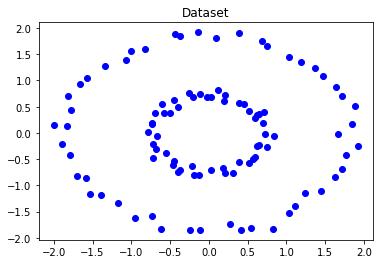

[[(-1.8933664904260934, -0.21641090451915465), (-1.7907107428095, -0.426317215387264), (-1.999644496806422, 0.15479968788948353), (-1.832727858551374, 0.12499783828541161), (-1.8143733126150114, 0.7027954752040237), (-1.7717314160289561, 0.43588365976592475), (-1.0080216293539865, 1.571391458349173), (-0.8211314890353081, 1.5946427824692027), (-1.074375310708158, 1.387188382864613), (-1.336241166343778, 1.2830411999998013), (-1.5734535573840882, 1.0549128096157272), (-1.6553958443858514, 0.9332497304847517), (-0.43633715062487427, 1.8814962232856351), (-0.3717784850722081, 1.8505255505170528), (-0.14507928543365878, 1.9198001394866078), (0.09736029179764588, 1.8173940566069655), (0.39108732681872826, 1.900794266980253), (0.7463702109164244, 1.666358534280697), (0.6918674769071368, 1.7563232100876611)], [(0.5411892915921691, -1.8097564660008745), (0.41289095482008153, -1.850919449987768), (0.26979056355254477, -1.7450066698692712), (0.832570397882427, -1.8363416898111904), (1.4496785190

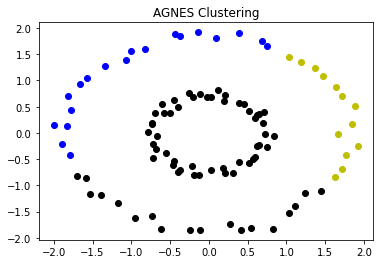

ARI: 0.304
NMI: 0.391
Silhouetter Score: 0.150


In [ ]:
X, y = make_circles(n_samples=100, factor=0.4, noise=0.0355)
X = StandardScaler().fit_transform(X)
#plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')

def load_dataset():
    data   = X
    dataset = []
    for d in data:
        dataset.append(tuple(d.copy()))
    return dataset


def show_dataset(dataset):
    print(dataset)
    for item in dataset:
        plt.plot(item[0], item[1], 'ob')
    plt.title("Dataset")
    plt.show()


def elu_distance(a, b):
    dist = np.sqrt(np.sum(np.square(np.array(a) - np.array(b))))
    return dist


def dist_min(ci, cj):
    return min(elu_distance(i, j) for i in ci for j in cj)


def dist_max(ci, cj):
    return max(elu_distance(i, j) for i in ci for j in cj)


def dist_avg(ci, cj):
    return sum(elu_distance(i, j) for i in ci for j in cj) / (len(ci) * len(cj))



def find_index(m):
    min_dist = float('inf')
    x = y = 0
    for i in range(len(m)):
        for j in range(len(m[i])):
            if i != j and m[i][j] < min_dist:
                min_dist, x, y = m[i][j], i, j
    return x, y, min_dist


def agnes(dataset, dist, k):
    c, m = [], []
    for item in dataset:
        ci = []
        ci.append(item)
        c.append(ci)
    for i in c:
        mi = []
        for j in c:
            mi.append(dist(i, j))
        m.append(mi)
    q = len(dataset)


    while q > k:
        x, y, min_dist = find_index(m)
        c[x].extend(c[y])
        c.remove(c[y])
        m = []
        for i in c:
            mi = []
            for j in c:
                mi.append(dist(i, j))
            m.append(mi)
        q -= 1
    #print(m)
    return c


def show_cluster(cluster, map_index):
    index = np.zeros(len(dataset))
    colors = ['ob', 'ok', 'oy', 'ow', 'or', 'og']
    for i in range(len(cluster)):
        for item in cluster[i]:
            plt.plot(item[0], item[1], colors[i])
            index[map_index[item]] = i
    plt.title("AGNES Clustering")
  
   
    
    plt.show()
    return index


if __name__ == "__main__":
    dataset = load_dataset()
    show_dataset(dataset)
    
    map_index = dict()
    for i in range(0, len(dataset)):
        map_index[(dataset[i][0], dataset[i][1])] = i

    
    k = 3
    cluster = agnes(dataset, dist_avg, k)
    print(cluster)
    agnes_label = y 
    
    agnes_pred = show_cluster(cluster, map_index)
    
    
    score = metrics.adjusted_rand_score(agnes_label, agnes_pred)
    print('ARI: %.3f' % score)

    score = metrics.normalized_mutual_info_score(agnes_label, agnes_pred,'arithmetic')
    print('NMI: %.3f' % score)

    score = metrics.silhouette_score(dataset, agnes_label, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

SECTION 6.1: CHEMELON WITH HEALTH DATA

In [ ]:
X = df[['Height(Inches)' , 'Weight(Pounds)']]
y = df['BMI']
ny = y.values.astype('float32', copy = False) #dataframe to numpy array
nX = X.values.astype('float64', copy = False) #dataframe to numpy array
#plt.scatter(nX[:, 0], nX[:, 1], c = ny, cmap = 'viridis', alpha = 0.7, edgecolors = 'b')
#plt.show();

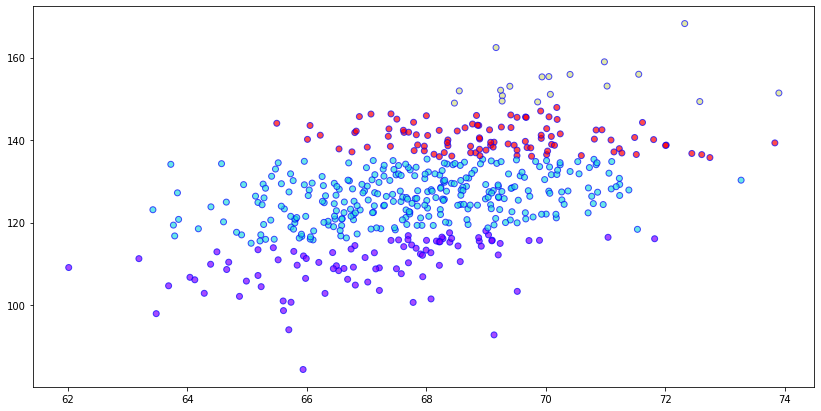

In [ ]:
## code ref https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html
## code ref https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
## code ref https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(nX)
graph = nbrs.kneighbors_graph(nX).toarray()
clustering = AgglomerativeClustering(n_clusters=4).fit(graph)
predY = clustering.labels_
plt.subplots(figsize=(14,7))
plt.scatter(nX[:, 0], nX[:, 1], c = predY, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [ ]:
nmi = normalized_mutual_info_score(ny,predY)
ari = adjusted_rand_score(ny,predY)
Ss = silhouette_score(X,predY)
print("NMI = ",nmi)
print("ARI = ",ari)
print("silhouette_score = ",Ss)

NMI =  0.29193510730302835
ARI =  0.0
silhouette_score =  0.42522618805593265


SECTION 6.2: CHEMELON WITH HEALTH DATACHEMELON WITH CUSTOM DATA 4 CLUSTERS 50 NEAREST NEIGHBOURS

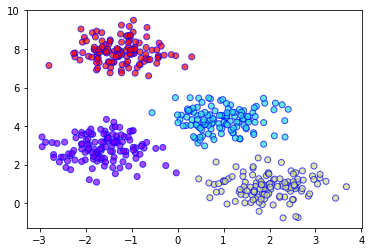

In [ ]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
nbrs = NearestNeighbors(n_neighbors=50, algorithm='kd_tree').fit(X)
graph = nbrs.kneighbors_graph(X).toarray()
clustering = AgglomerativeClustering(n_clusters=4).fit(graph)
predY = clustering.labels_
plt.scatter(X[:, 0], X[:, 1], c = predY, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show();

In [ ]:
nmi = normalized_mutual_info_score(y,predY)
ari = adjusted_rand_score(y,predY)
Ss = silhouette_score(X,predY)
print("NMI = ",nmi)
print("ARI = ",ari)
print("silhouette_score = ",Ss)

NMI =  1.0
ARI =  1.0
silhouette_score =  0.6844837346859131


SECTION 6.2: CHEMELON WITH HEALTH DATACHEMELON WITH CUSTOM DATA 4 CLUSTERS 100 NEAREST NEIGHBOURS

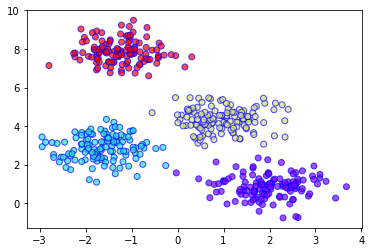

In [ ]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
nbrs = NearestNeighbors(n_neighbors=100, algorithm='kd_tree').fit(X)
graph = nbrs.kneighbors_graph(X).toarray()
clustering = AgglomerativeClustering(n_clusters=4).fit(graph)
predY = clustering.labels_
plt.scatter(X[:, 0], X[:, 1], c = predY, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show();

In [ ]:
nmi = normalized_mutual_info_score(y,predY)
ari = adjusted_rand_score(y,predY)
Ss = silhouette_score(X,predY)
print("NMI = ",nmi)
print("ARI = ",ari)
print("silhouette_score = ",Ss)

NMI =  0.991591487539297
ARI =  0.9946559286607272
silhouette_score =  0.6845008744701502
